# Project 1: Extended Otsu's Method

## Team Members: Busi Reddy Karnati(bk2444), Anirudh Tapedia(at4924)


## Import Statements

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Labelling images
These images will be used throughout, the order reamaining same

In [2]:
image1 = "images/basket_balls.bmp" 
image2 = "images/blackroll-duoball.bmp"
image3 = "images/data13.bmp"
image4 = "images/rock-stream1.bmp"
image5 = "images/tiger1.bmp"

## Method to convert color image to grayscale, given the path name taken above

In [3]:
def convert_rgb_to_gray(image_path):
    '''
    Description: Converts an image from color to grayscale.
    params:
        image_path: path to image
        
    returns:
        type: imageio.core.util.Array
        grayscale image of the image at given path, returned as an numpy array
    '''
    pic = imageio.imread(image_path)
    gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
    gray_image_array = gray(pic)
    for row in range(len(gray_image_array)):
        for col in range(len(gray_image_array[0])):
            gray_image_array[row][col] = int(round(gray_image_array[row][col]))
    return gray_image_array


## Method to convert Array to list of the gray image generated from method above

In [4]:
def convert_gray_image_to_list(array):
    '''
    The output of convert_rgb_to_gray method is an Array, this method converts it to list of lists
    params:
        array: Array to be converted
        
    returns:
        type: list[list]
        converted form
    '''
    return [list(elem) for elem in array]    

## Let us convert each of the image to grayscale and convert the representation to list

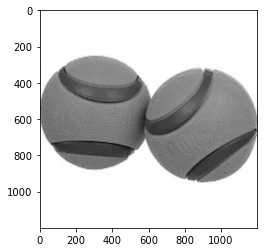

In [5]:
images = [image1, image2, image3, image4, image5]
gray_images = []

#Here we are converting each color image to gray and storing list[list] representation in an array

gray_image = convert_rgb_to_gray(image1)
gray_image = convert_gray_image_to_list(gray_image)
plt.imshow(gray_image, cmap = plt.get_cmap(name = 'gray'))
gray_images.append(gray_image)


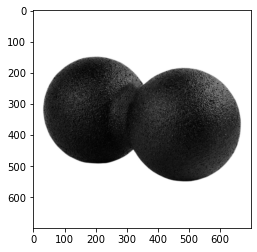

In [6]:
gray_image = convert_rgb_to_gray(image2)
gray_image = convert_gray_image_to_list(gray_image)
plt.imshow(gray_image, cmap = plt.get_cmap(name = 'gray'))
gray_images.append(gray_image)


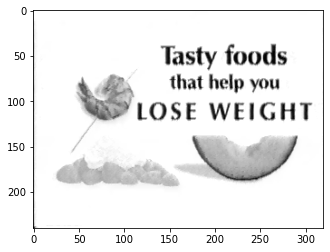

In [7]:
gray_image = convert_rgb_to_gray(image3)
gray_image = convert_gray_image_to_list(gray_image)
plt.imshow(gray_image, cmap = plt.get_cmap(name = 'gray'))
gray_images.append(gray_image)

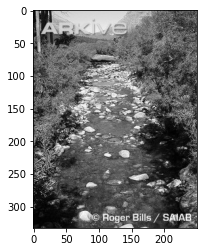

In [8]:
gray_image = convert_rgb_to_gray(image4)
gray_image = convert_gray_image_to_list(gray_image)
plt.imshow(gray_image, cmap = plt.get_cmap(name = 'gray'))
gray_images.append(gray_image)

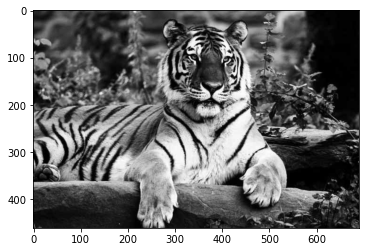

In [9]:
gray_image = convert_rgb_to_gray(image5)
gray_image = convert_gray_image_to_list(gray_image)
plt.imshow(gray_image, cmap = plt.get_cmap(name = 'gray'))
gray_images.append(gray_image)

## Given a grayscale image, this method converts it to histogram with X-axis being 0-255 and Y-axis being the frequency of the gray level in the image

In [10]:
def list_to_histogram(image):
    '''
    This method forms an image histogram using the gray level values
    params: 
        image in list[list] format
    returns:
        type: list of 256 values[0-255] each indicating the number of pixels for each gray value
        histogram for the image given
    '''
    histogram = [0 for i in range(256)]
    for row in range(len(image)):
        for col in range(len(image[0])):
            histogram[int(image[row][col])] += 1
    return histogram

## Given a histogram generated from above method, and range of gray level values, this method generates the mean and weight 

In [11]:
def mean_and_weight(histogram, low, high):
    '''
    Given a histogram, find the total weight of pixels between [low, high](inclusive) and mean of pixel values
    
    '''
    weighted_sum = 0
    total_number_of_pixels = 0
    for gray_level in range(low, high+1):
        total_number_of_pixels += histogram[gray_level]
        weighted_sum += (histogram[gray_level]*gray_level)
    if total_number_of_pixels == 0:
        return 0, 0
    # mean = weighed sum / total_number_of_pixels and weight = total_number_of_pixels(in this segment)/ total number of pixels
    return weighted_sum/total_number_of_pixels,(total_number_of_pixels/sum(histogram))

## Given a range of gray levels, this method find the variance of that gray levels

In [12]:
def variance(histogram, low, high, mean):
    total_number_of_pixels = sum(histogram[low:high+1])
    square_sum = 0
    for i in range(low, high+1):
        square_sum += histogram[i]*((i-mean)**2)
    if total_number_of_pixels == 0:
        return 0
    return square_sum/total_number_of_pixels


## Let us plot each of the histogram

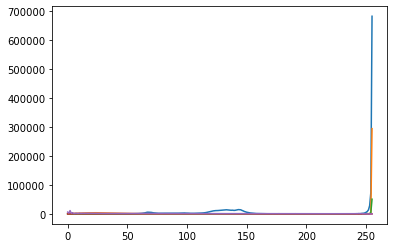

In [13]:
histograms = []
for gray_image in gray_images:
    histograms.append(list_to_histogram(gray_image))
    plt.plot(histograms[-1])
plt.show()


## The above picture doesn't explain a lot about the number of segments because of the concentration of brighter pixels with gray levels[251-255]. Let us remove that and see how histograms look like

<function matplotlib.pyplot.show(close=None, block=None)>

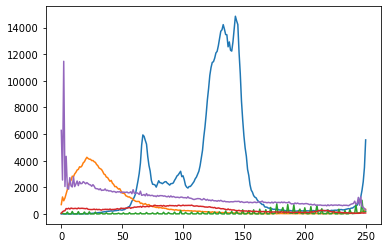

In [14]:
#The image before isn't legible, because of the higher number of lighter pixels(gray value 251-255), let's see the values till 250
for histogram in histograms:
    plt.plot(histogram[:-5])
plt.show

## Below are the methods to find total_variance of each segments. 
This is for 2,3 and 4 segments. 

In [15]:
'''
In these methods, we have considered error synonymous to variance as that is the factor we are trying to reduce

total_error is the total variance we are trying to reduce
'''
def find_min_error_threshold_two_segments(histogram):
    print("enter - 2")
    g = 256
    min_error = float("inf")
    min_error_threshold = -1
    for threshold in range(1, g):
        #Calculate background weight, variance
        background_mean, background_weight = mean_and_weight(histogram, 0, threshold)
        background_variance = variance(histogram,0, threshold, background_mean)
        #Calculate foreground weight, variance
        foreground_mean, foreground_weight = mean_and_weight(histogram, threshold+1, g-1)
        foreground_variance = variance(histogram, threshold+1, g-1, foreground_mean )
        #Compare with the smallest
        total_error = (foreground_variance*foreground_weight)+(background_variance*background_weight)
        if total_error < min_error:
            min_error = total_error
            min_error_threshold = threshold
#     print(min_error, " is the min squared error for the image segments - 2")
    return [min_error, min_error_threshold]

def find_min_error_threshold_three_segments(histogram):
    print("enter - 3")
    g = 256
    min_error = float("inf")
    min_error_threshold = [-1, -1]
    for threshold1 in range(1, g):
        for threshold2 in range(threshold1+1, g):
            segment1_mean, segment1_weight = mean_and_weight(histogram, 0, threshold1)
            segment1_variance = variance(histogram, 0, threshold1, segment1_mean)
            
            segment2_mean, segment2_weight = mean_and_weight(histogram, threshold1+1, threshold2)
            segment2_variance = variance(histogram, threshold1, threshold2, segment2_mean)
            
            
            segment3_mean, segment3_weight = mean_and_weight(histogram, threshold2+1, g-1)
            segment3_variance = variance(histogram, threshold2+1, g-1, segment3_mean)
            
            total_error = (segment1_weight*segment1_variance)+(segment2_weight*segment2_variance)+(segment3_weight*segment3_variance)
            
            
            if total_error < min_error:
                min_error = total_error
                min_error_threshold = [threshold1, threshold2]
#     print(min_error, " it the min squared error for the image segments - 3")
    return [min_error, min_error_threshold]

def find_min_error_threshold_four_segments(histogram):
    print("enter - 4")
    g = 256
    min_error = float("inf")
    min_error_threshold = [-1, -1, -1]
    for threshold1 in range(1, g):
        for threshold2 in range(threshold1+1, g):
            for threshold3 in range(threshold2+1, g):
                segment1_mean, segment1_weight = mean_and_weight(histogram, 0, threshold1)
                segment1_variance = variance(histogram, 0, threshold1, segment1_mean)

                segment2_mean, segment2_weight = mean_and_weight(histogram, threshold1+1, threshold2)
                segment2_variance = variance(histogram, threshold1, threshold2, segment2_mean)


                segment3_mean, segment3_weight = mean_and_weight(histogram, threshold2+1, threshold3)
                segment3_variance = variance(histogram, threshold2+1, threshold3, segment3_mean)
                
                segment4_mean, segment4_weight = mean_and_weight(histogram, threshold3+1, g-1)
                segment4_variance = variance(histogram, threshold3+1, g-1, segment4_mean)

                total_error = (segment1_weight*segment1_variance)+(segment2_weight*segment2_variance)+(segment3_weight*segment3_variance)+(segment4_weight*segment4_variance)                
                if total_error < min_error:
                    min_error = total_error
                    min_error_threshold = [threshold1, threshold2, threshold3]
#     print(min_error, " it the min squared error for the image segments - 3")
    return [min_error, min_error_threshold]

## For each image, for 2,3 and 4 segments find total variance. 

In [16]:
'''
Note: Print statements are used just to understand which part of the execution the program is in
'''
total_variances = []
thresholds = []
for i,histogram in enumerate(histograms):
    total_variance1, threshold1 = find_min_error_threshold_two_segments(histogram)
    total_variance2, threshold2 = find_min_error_threshold_three_segments(histogram)
    total_variance3, threshold3 = find_min_error_threshold_four_segments(histogram)
    variances = [total_variance1, total_variance2, total_variance3]
    thres = [threshold1, threshold2, threshold3]
    total_variances.append(variances)
    thresholds.append(thres)

enter - 2
enter - 3
enter - 4
enter - 2
enter - 3
enter - 4
enter - 2
enter - 3
enter - 4
enter - 2
enter - 3
enter - 4
enter - 2
enter - 3
enter - 4


## Let us give methods to divide the image into given number of segments with different gray levels for each segment

In [17]:
def divide_into_two_segments(gray_image, threshold):
    for i in range(len(gray_image)):
        for j in range(len(gray_image[0])):
            if gray_image[i][j] <= threshold:
                gray_image[i][j] = 0
            else:
                gray_image[i][j] = 255
    return gray_image

def divide_into_three_segments(gray_image, threshold):
    for i in range(len(gray_image)):
        for j in range(len(gray_image[0])):
            if gray_image[i][j] <= threshold[0]:
                gray_image[i][j] = 0
            elif gray_image[i][j] <= threshold[1]:
                gray_image[i][j] = 128
            else:
                gray_image[i][j] = 255
    return gray_image

def divide_into_four_segments(gray_image, threshold):
    for i in range(len(gray_image)):
        for j in range(len(gray_image[0])):
            if gray_image[i][j] <= threshold[0]:
                gray_image[i][j] = 0
            elif gray_image[i][j] <= threshold[1]:
                gray_image[i][j] = 85
            elif gray_image[i][j] <= threshold[2]:
                gray_image[i][j] = 170
            else:
                gray_image[i][j] = 255
    return gray_image
'''
This method saves image given the image gray_values as a list
'''
def save_li_to_img(li, output_file):
    #Coverting li into np.array
    img_array=np.asarray(li, dtype=np.uint8)
    #Coverting the np.array image into a PIL Image
    im = Image.fromarray(img_array)
    #Saving the PIL Image
    im.save(output_file)
    return "Image Saved"

## Observing the histograms generated and observing the images manually, the parameters are manually tuned to generate the number of segments and divide the image using methods above.

In [20]:
final_outputs = []
for i in range(len(images)):
    diff1 = total_variances[i][0]-total_variances[i][1]
    diff2 = total_variances[i][1]-total_variances[i][2]
    diff_ratio = (diff1/diff2)
    image_name = images[i].split("/")[1]
    if total_variances[i][0] < 300 or diff_ratio<3:
        final_outputs.append(divide_into_two_segments(gray_images[i], thresholds[i][0]))
        print(image_name, " has 2 segments and the threshold is: ", thresholds[i][0])
        
    elif diff_ratio < 4 or diff_ratio > 6:
        final_outputs.append(divide_into_three_segments(gray_images[i], thresholds[i][1]))
        print(image_name, " has 3 segments and the thresholds are :", thresholds[i][1])
 
    else:
        final_outputs.append(divide_into_four_segments(gray_images[i], thresholds[i][2]))
        print(image_name, " has 4 segments and the thresholds are :", thresholds[i][2])


basket_balls.bmp  has 3 segments and the thresholds are : [107, 194]
blackroll-duoball.bmp  has 2 segments and the threshold is:  145
data13.bmp  has 4 segments and the thresholds are : [77, 154, 221]
rock-stream1.bmp  has 3 segments and the thresholds are : [72, 150]
tiger1.bmp  has 2 segments and the threshold is:  108


## Now that we have divided images, let us visualise the segements, for each image

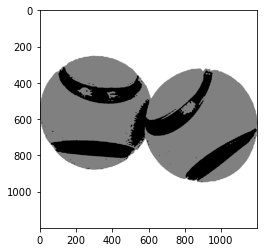

In [21]:
plt.imshow(final_outputs[0], cmap = plt.get_cmap(name = 'gray'))

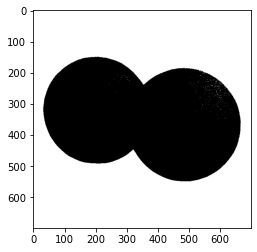

In [22]:
plt.imshow(final_outputs[1], cmap = plt.get_cmap(name = 'gray'))

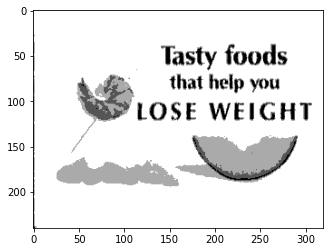

In [23]:
plt.imshow(final_outputs[2], cmap = plt.get_cmap(name = 'gray'))

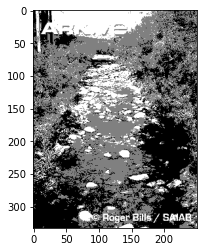

In [24]:
plt.imshow(final_outputs[3], cmap = plt.get_cmap(name = 'gray'))

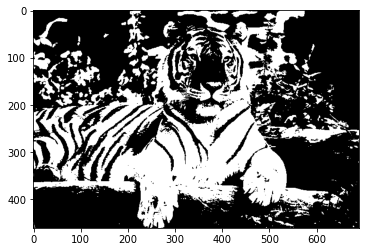

In [25]:
plt.imshow(final_outputs[4], cmap = plt.get_cmap(name = 'gray'))

## Let us save each image as a .bmp image 

In [29]:
for i in range(len(images)):
    image_name = images[i].split(".")[0]
    image = final_outputs[i]
    print(image_name)
    output_name = "output_images/"+image_name+"_output.bmp"
    save_li_to_img(image, output_name)
    

images/basket_balls


FileNotFoundError: [Errno 2] No such file or directory: 'output_images/images/basket_balls_output.bmp'